# Exploratory data analysis

## Wine

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red (1).csv')


In [ ]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
red_wine["high_quality"] = pd.cut(red_wine.quality, bins = [0,6,10], labels = [0,1])

In [ ]:
red_wine.high_quality.value_counts(normalize=True) # chất lượng tốt chiếm 14% data

0    0.86429
1    0.13571
Name: high_quality, dtype: float64

In [ ]:
del red_wine["high_quality"]

In [ ]:
white_wine = pd.read_csv("/content/drive/MyDrive/winequality-white.csv", sep =";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
#combine two dataset
wine = pd.concat([white_wine.assign(kind="white"), red_wine.assign(kind="red")])
wine.sample(10, random_state=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
848,6.4,0.64,0.21,1.8,0.081,14.0,31.0,0.99689,3.59,0.66,9.8,5,red
2529,6.6,0.42,0.13,12.8,0.044,26.0,158.0,0.99772,3.24,0.47,9.0,5,white
131,5.6,0.50,0.09,2.3,0.049,17.0,99.0,0.99370,3.63,0.63,13.0,5,red
244,15.0,0.21,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7,red
1551,6.6,0.19,0.99,1.2,0.122,45.0,129.0,0.99360,3.09,0.31,8.7,6,white
447,9.3,0.48,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2,5,red
3234,6.6,0.25,0.34,3.0,0.054,22.0,141.0,0.99338,3.26,0.47,10.4,6,white
3147,7.2,0.32,0.40,8.7,0.038,45.0,154.0,0.99568,3.20,0.47,10.4,6,white
2289,7.3,0.40,0.28,6.5,0.037,26.0,97.0,0.99148,3.16,0.58,12.6,7,white
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,red


In [ ]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

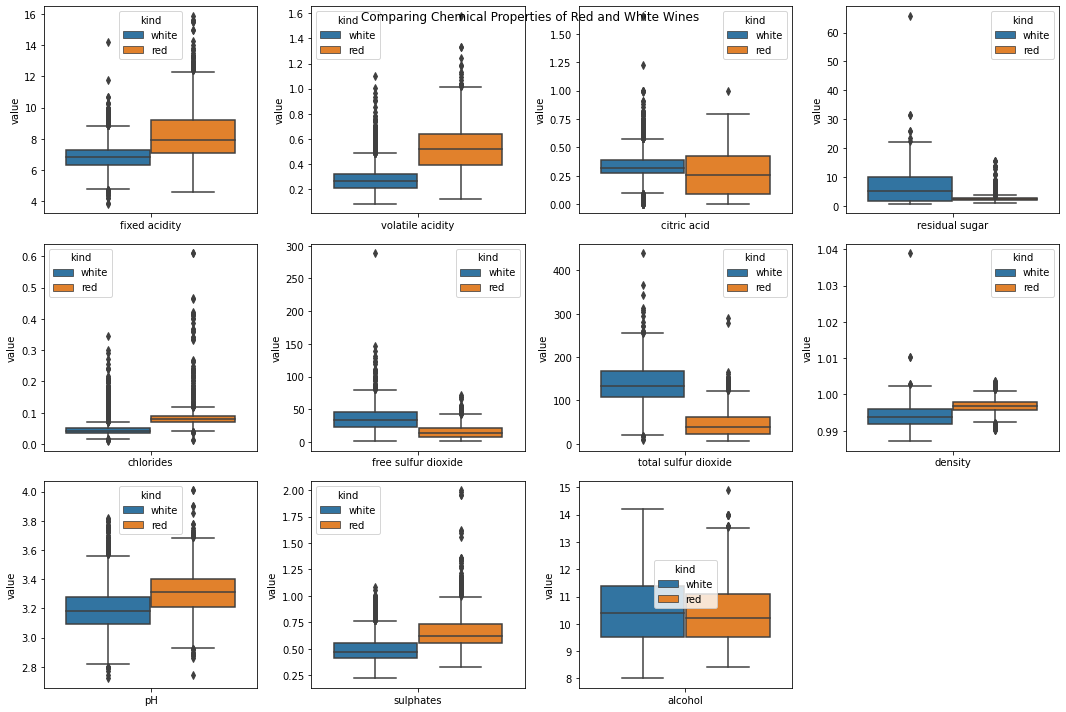

In [ ]:
import math
chemical_properties = [col for col in wine.columns                    
if col not in ['quality', 'kind']]

melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(
math.ceil(len(chemical_properties) / 4), 4, figsize=(15, 10))

axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
  sns.boxplot(data=melted[melted.variable.isin([prop])], x='variable', y='value', hue='kind', ax=ax).set_xlabel('')

for ax in axes[len(chemical_properties):]:
  ax.remove()
  
plt.suptitle('Comparing Chemical Properties of Red and White Wines')
plt.tight_layout()

## Planet

In [ ]:
import io
import requests
url = "https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_09/data/planets.csv"
read_data = requests.get(url).content
read_data

b'mass,description,periastrontime,semimajoraxis,discoveryyear,list,eccentricity,period,discoverymethod,lastupdate,periastron,name\n19.4,11 Com b is a brown dwarf-mass companion to the intermediate-mass star 11 Comae Berenices.,2452899.6,1.29,2008,Confirmed planets,0.231,326.03,RV,15/09/20,94.8,11 Com b\n11.20,11 Ursae Minoris is a star located in the constellation Ursa Minor and also named Pherkard or Pherkad Minor.,2452861.04,1.54,2009,Confirmed planets,0.08,516.22,RV,15/09/20,117.63,11 UMi b\n4.8,14 Andromedae is an evolved star in the constellation of Andromeda. It was formerly an A-type dwarf.,2452861.4,0.83,2008,Confirmed planets,0,185.84,RV,15/09/20,0,14 And b\n4.975,"The star 14 Herculis is only 59 light years away in the constellation Hercules. However, because it is an orange dwarf star it can not be seen with the naked eye. There is only one confirmed planet in the system, but a dynamical analysis suggests that they might be two planets locked in a 4:1 mean motion resonance."

In [ ]:
planets = pd.read_csv(io.StringIO(read_data.decode("utf-8")))
planets.head()

,mass,description,periastrontime,semimajoraxis,discoveryyear,list,eccentricity,period,discoverymethod,lastupdate,periastron,name
0,19.400,11 Com b is a brown dwarf-mass companion to th...,2452899.60,1.290,2008.0,Confirmed planets,0.231,326.03,RV,15/09/20,94.800,11 Com b
1,11.200,11 Ursae Minoris is a star located in the cons...,2452861.04,1.540,2009.0,Confirmed planets,0.080,516.22,RV,15/09/20,117.630,11 UMi b
2,4.800,14 Andromedae is an evolved star in the conste...,2452861.40,0.830,2008.0,Confirmed planets,0.000,185.84,RV,15/09/20,0.000,14 And b
3,4.975,The star 14 Herculis is only 59 light years aw...,NaN,2.864,2002.0,Confirmed planets,0.359,1766.00,RV,15/09/21,22.230,14 Her b
4,7.679,14 Her c is the second companion in the system...,NaN,9.037,2006.0,Controversial,0.184,9886.00,RV,15/09/21,189.076,14 Her c


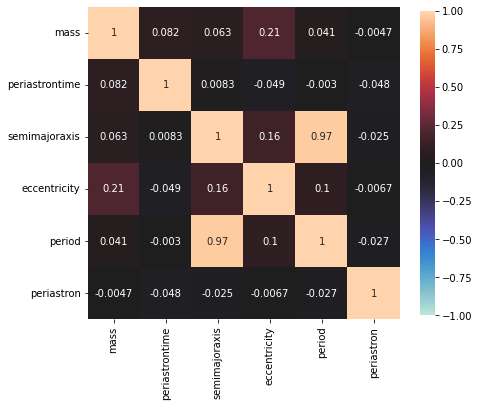

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(planets.drop(columns='discoveryyear').corr(),center=0, vmin=-1, vmax=1, square=True, annot=True,cbar_kws={'shrink': 0.8})

In [ ]:
planets.eccentricity.min(), planets.eccentricity.max()

(0.0, 0.956)

Text(0.5, 1.0, 'Orbit Eccentricities')

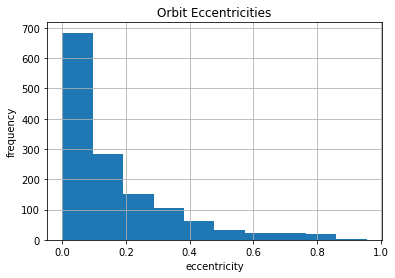

In [ ]:
planets.eccentricity.hist()
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title('Orbit Eccentricities')

In [ ]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].describe()

,period,eccentricity,semimajoraxis,mass
count,3930.000000,1388.000000,1704.000000,1659.000000
mean,524.084969,0.159016,5.837964,2.702061
std,7087.428665,0.185041,110.668743,8.526177
min,0.090706,0.000000,0.004420,0.000008
25%,4.552475,0.013000,0.051575,0.085000
50%,12.364638,0.100000,0.140900,0.830000
75%,46.793136,0.230000,1.190000,2.440000
max,320000.000000,0.956000,3500.000000,263.000000


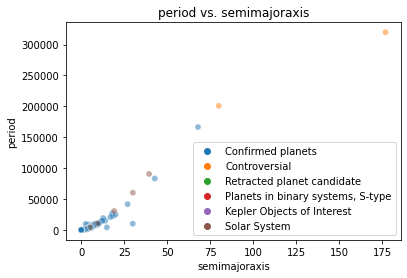

In [ ]:
# We might want to see if the period (and distance from the star) influences
sns.scatterplot( x=planets.semimajoraxis, y=planets.period, hue=planets.list, alpha=0.5)
plt.title('period vs. semimajoraxis')
plt.legend(title='') 



We can see that the scale of period is making this pretty difficult to read, 
so we could try a log transformation on the y-axis to get more separation in the denser section on the lower-left

# Preprocessing data

In [ ]:
planets.index

RangeIndex(start=0, stop=4094, step=1)

In [ ]:
shuffled = planets.reindex(np.random.permutation(planets.index))
train_end_index = int(np.ceil(shuffled.shape[0] * .75))
training = shuffled.iloc[:train_end_index,]
testing = shuffled.iloc[train_end_index:,]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = planets[['eccentricity', 'semimajoraxis', 'mass']]
y = planets.period

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Scaling and centering data

In [ ]:
from sklearn.preprocessing import StandardScaler
standardized = StandardScaler().fit_transform(X_train)

In [ ]:
standardized[~np.isnan(standardized)][:30]

array([-5.43618156e-02,  1.43278593e+00,  1.95196592e+00,  4.51498477e-03,
       -1.96265630e-01,  7.79591646e-02, -4.74717586e-02, -3.12856028e-01,
       -4.18101448e-01, -5.47587283e-02, -2.46399501e-01,  1.65946487e+00,
       -8.59044215e-01, -5.47511116e-02, -4.04573808e-01,  1.88194856e-01,
       -5.41905011e-02, -4.75421907e-01,  1.33077010e-01, -3.01831439e-02,
       -1.08822831e-01,  1.62409605e-01,  1.21526007e+01,  1.73149454e+00,
       -2.25664815e-02,  9.91013258e-01, -7.48808523e-01, -4.99260165e-02,
       -8.59044215e-01, -5.49264158e-02])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
normalized = MinMaxScaler().fit_transform(X_train)

In [ ]:
normalized[~np.isnan(normalized)][:30]

array([2.28055906e-05, 1.24474091e-01, 5.33472803e-01, 1.71374569e-03,
       1.83543340e-02, 1.77824268e-01, 2.20687839e-04, 1.07593965e-02,
       8.36820084e-02, 1.14062675e-05, 1.50885109e-02, 1.39240422e-01,
       0.00000000e+00, 1.16250178e-05, 4.78471239e-03, 1.98744770e-01,
       2.77257370e-05, 1.69522066e-04, 1.88284519e-01, 7.17216379e-04,
       2.40505371e-02, 6.24847487e-03, 8.22784793e-01, 4.91631799e-01,
       9.35966714e-04, 9.56961137e-02, 2.09205021e-02, 1.50201619e-04,
       0.00000000e+00, 6.59028789e-06])

## Encoding data

In [ ]:
from sklearn.preprocessing import LabelEncoder
pd.Series(LabelEncoder().fit_transform(pd.cut(red_wine.quality, bins=[-1, 3, 6, 10], labels=['0-3 (low)', '4-6 (med)', '7-10 (high)']))).value_counts()


1    1372
2     217
0      10
dtype: int64

In [ ]:
planets.list.value_counts()

Confirmed planets                    3972
Controversial                          97
Retracted planet candidate             11
Solar System                            9
Kepler Objects of Interest              4
Planets in binary systems, S-type       1
Name: list, dtype: int64

In [ ]:
planets.head()

,mass,description,periastrontime,semimajoraxis,discoveryyear,list,eccentricity,period,discoverymethod,lastupdate,periastron,name
0,19.400,11 Com b is a brown dwarf-mass companion to th...,2452899.60,1.290,2008.0,Confirmed planets,0.231,326.03,RV,15/09/20,94.800,11 Com b
1,11.200,11 Ursae Minoris is a star located in the cons...,2452861.04,1.540,2009.0,Confirmed planets,0.080,516.22,RV,15/09/20,117.630,11 UMi b
2,4.800,14 Andromedae is an evolved star in the conste...,2452861.40,0.830,2008.0,Confirmed planets,0.000,185.84,RV,15/09/20,0.000,14 And b
3,4.975,The star 14 Herculis is only 59 light years aw...,NaN,2.864,2002.0,Confirmed planets,0.359,1766.00,RV,15/09/21,22.230,14 Her b
4,7.679,14 Her c is the second companion in the system...,NaN,9.037,2006.0,Controversial,0.184,9886.00,RV,15/09/21,189.076,14 Her c


In [ ]:
pd.get_dummies(planets.list).head()

,Confirmed planets,Controversial,Kepler Objects of Interest,"Planets in binary systems, S-type",Retracted planet candidate,Solar System
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0


One of these columns is redundant because the values in the 
remaining ones can be used to determine the value for the redundant one. So we should remove one redundant column

In [ ]:
pd.get_dummies(planets.list, drop_first=True).head()

,Controversial,Kepler Objects of Interest,"Planets in binary systems, S-type",Retracted planet candidate,Solar System
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


## Imputing

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
KNNImputer().fit_transform( planets[['semimajoraxis', 'mass', 'eccentricity']])

array([[ 1.29    , 19.4     ,  0.231   ],
       [ 1.54    , 11.2     ,  0.08    ],
       [ 0.83    ,  4.8     ,  0.      ],
       ...,
       [ 0.404726,  0.3334  ,  0.31    ],
       [ 0.85486 ,  0.4     ,  0.27    ],
       [ 0.15324 ,  0.42    ,  0.16    ]])

this is certainly better than using the 
SimpleImputer class for the planets data, imputing can be dangerous. 

Rather than imputing the data, in some cases, we may be more interested in noting where 
we have missing data and using that as a feature in our mode

In [ ]:
from sklearn.impute import MissingIndicator
MissingIndicator().fit_transform(planets[['semimajoraxis', 'mass', 'eccentricity']])

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

## Additional transformers

In [ ]:
from sklearn.preprocessing import FunctionTransformer
FunctionTransformer(np.abs,validate = True).fit_transform(X_train.dropna())

array([[0.51   , 4.94   , 1.45   ],
       [0.17   , 0.64   , 0.85   ],
       [0.08   , 0.03727, 1.192  ],
       ...,
       [0.295  , 4.46   , 1.8    ],
       [0.34   , 0.0652 , 0.0087 ],
       [0.3    , 1.26   , 0.5    ]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import (MinMaxScaler, StandardScaler)

In [ ]:
ColumnTransformer([('impute', KNNImputer(), [0]), ('standard_scale', StandardScaler(), [1]), ('min_max', MinMaxScaler(), [2])]).fit_transform(X_train)[10:15]

array([[ 0.17      , -0.04747176,  0.0107594 ],
       [ 0.08      , -0.05475873,  0.01508851],
       [ 0.15585591,         nan,  0.13924042],
       [ 0.15585591,         nan,         nan],
       [ 0.        , -0.05475111,  0.00478471]])

In [ ]:
from sklearn.compose import make_column_transformer

In [ ]:
from sklearn.preprocessing import (OneHotEncoder, StandardScaler)

In [ ]:
categorical = [col for col in planets.columns if col in ['list','name','description','discoverymethod','lastupdate']]
numeric = [col for col in planets.columns if col not in categorical]
make_column_transformer((StandardScaler(),numeric),(OneHotEncoder(sparse=False),categorical)).fit_transform(planets.dropna())

array([[ 3.09267587, -0.2351423 , -0.40487424, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.432445  , -0.24215395, -0.28360905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13665505, -0.24208849, -0.62800218, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.83289954, -0.76197788, -0.84918988, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.25813535,  0.38683239, -0.92873984, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26827931, -0.21657671, -0.70076129, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import ( MinMaxScaler, StandardScaler)

In [ ]:
ColumnTransformer([
                   ('impute',Pipeline([
                                       ('impute', KNNImputer()),
                                       ('scale',StandardScaler())
                   ]),[0]),
                   ('standard_scale',StandardScaler(),[1]),
                   ('min_max',MinMaxScaler(),[2])
]).fit_transform(X_train)[10:15]

array([[ 0.13531604, -0.04747176,  0.0107594 ],
       [-0.7257111 , -0.05475873,  0.01508851],
       [ 0.        ,         nan,  0.13924042],
       [ 0.        ,         nan,         nan],
       [-1.49106856, -0.05475111,  0.00478471]])

# Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kmeans_pipeline = Pipeline([
                            ('scale',StandardScaler()),
                            ('kmeans',KMeans(8, random_state = 0))
])

In [ ]:
kmeans_data = planets[['semimajoraxis','period']].dropna()
kmeans_pipeline.fit(kmeans_data)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=8, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=0, tol=0.0001,
                        verbose=0))],
         verbose=False)

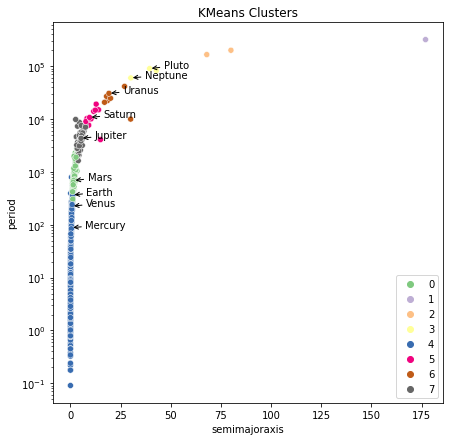

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (7,7))
sns.scatterplot(
    x = kmeans_data.semimajoraxis,
    y = kmeans_data.period,
    hue = kmeans_pipeline.predict(kmeans_data),
    ax = ax, palette = "Accent"
)
ax.set_yscale('log')
solar_system = planets[planets.list == "Solar System"]

for planet in solar_system.name:
  data = solar_system.query(f'name == "{planet}"')
  ax.annotate(
      planet,
      (data.semimajoraxis, data.period),
      (7+data.semimajoraxis, data.period),
      arrowprops = dict(arrowstyle = "->")
  )
  #ax.get_legend().remove()
  ax.set_title('KMeans Clusters')

## The elbow point method

The elbow point method involves creating multiple models with many values of k and 
plotting each model's inertia (within-cluster sum of squares) versus the number of 
clusters

In [ ]:
import matplotlib.pyplot as plt
def elbow_point(data, pipeline, kmeans_step_name='kmeans', k_range=range(1, 11), ax=None):
 scores = []
 for k in k_range:
  pipeline.named_steps[kmeans_step_name].n_clusters = k
  pipeline.fit(data)
  scores.append(pipeline.score(data) * -1)
 if not ax:
  fig, ax = plt.subplots()
 ax.plot(k_range, scores, 'bo-')
 ax.set_xlabel('k')
 ax.set_ylabel('inertias')
 ax.set_title('Elbow Point Plot')
 return ax

In [ ]:
pip install django-model-utils

Text(4.4, 1450, '')

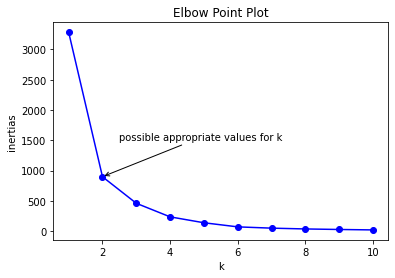

In [ ]:

ax = elbow_point(kmeans_data, Pipeline([('scale', StandardScaler()), ('kmeans', KMeans(random_state=0))]))

ax.annotate('possible appropriate values for k', xy=(2, 900), xytext=(2.5, 1500), arrowprops=dict(arrowstyle='->'))

ax.annotate('', xy=(3, 3480), xytext=(4.4, 1450), arrowprops=dict(arrowstyle='->'))


## Evaluating clustering results

In [ ]:
# silhouette coefficient
from sklearn.metrics import silhouette_score
silhouette_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

0.7585148982324125

In [ ]:
# Davies-Bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

0.46299400068592045

In [ ]:
# Variance Ratio Criterion
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(kmeans_data, kmeans_pipeline.predict(kmeans_data))

21227.760079488715

# Regression

## Linear Regression

In [ ]:
data = planets [["semimajoraxis","period","mass","eccentricity"]].dropna()
X = data[['semimajoraxis', 'mass', 'eccentricity']]
y = data.period

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

### Interpreting the linear regression equation

In [ ]:
lm.intercept_

-622.9909910671806

In [ ]:
[(col, coef) for col, coef in zip(X_train.columns, lm.coef_)]

[('semimajoraxis', 1880.4365990440929),
 ('mass', -90.18675916509233),
 ('eccentricity', -3201.0780593330896)]

### Making predictions

In [ ]:
preds = lm.predict(X_test)

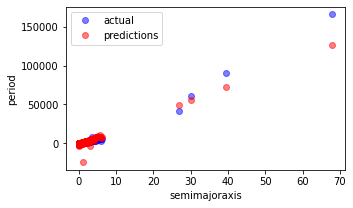

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
axes.plot(X_test.semimajoraxis, y_test, "ob",label = "actual", alpha = 0.5)
axes.plot(X_test.semimajoraxis, preds, "or", label = "predictions", alpha = 0.5)
axes.set(xlabel='semimajoraxis', ylabel='period')
axes.legend()

## Evaluating regression results

* how much of the 
variance in the data our model is able to capture
* how accurate the predictions 
are

### Residuals

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_residuals(y_test, preds):
  residuals = y_test - preds
  fig, axes = plt.subplots(1, 2, figsize=(15, 3))
  axes[0].scatter(np.arange(residuals.shape[0]), residuals)
  axes[0].set(xlabel='Observation', ylabel='Residual')
  residuals.plot(kind='kde', ax=axes[1])
  axes[1].set_xlabel('Residual')
  plt.suptitle('Residuals')
  return axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e04eecf50>,
      dtype=object)

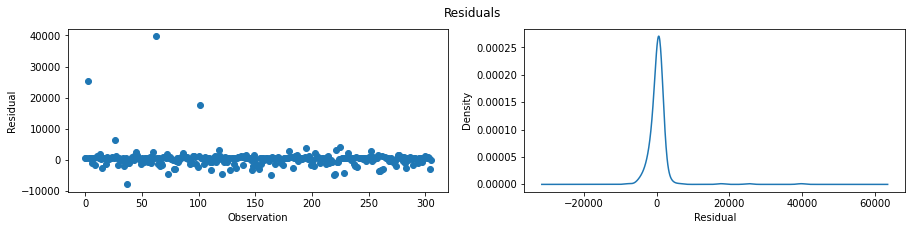

In [ ]:
plot_residuals(y_test, preds)

### Metrics

In [ ]:
#R2
lm.score(X_test, y_test)

0.9209013475842682

In [ ]:
#adjusted R2
from sklearn.metrics import r2_score
def adjusted_r2(model, X, y):
 r2 = r2_score(y, model.predict(X))
 n_obs, n_regressors = X.shape
 adj_r2 = 1 - (1 - r2) * (n_obs - 1)/(n_obs - n_regressors - 1)
 return adj_r2
adjusted_r2(lm, X_test, y_test)

0.920115599381463

Unfortunately, R2
 (and adjusted R2
) values don't tell us anything about our prediction 
error or even whether we specified our model correctly

In [ ]:
#explained variance score
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, preds)

0.9220144218429369

In [ ]:
#Mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

1369.4418170735335

In [ ]:
# Root mean squared error (RMSE) 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, preds))

3248.4999619283763

In [ ]:
# Median absolute error
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, preds)

759.8613358335448

# Classification

## Logistic Regression

### Predicting red wine quality

In [ ]:
red_wine["high_quality"] = pd.cut(red_wine.quality, bins = [0,6,10], labels = [0,1])

In [ ]:
from sklearn.model_selection import train_test_split

red_y = red_wine.pop('high_quality')
red_X = red_wine.drop(columns='quality')
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(red_X, red_y, test_size=0.1, random_state=0,stratify=red_y)


In [ ]:
from sklearn.preprocessing import StandardScaler
>>> from sklearn.pipeline import Pipeline
>>> from sklearn.linear_model import LogisticRegression
>>> red_quality_lr = Pipeline([
... ('scale', StandardScaler()), 
... ('lr', LogisticRegression(
... class_weight='balanced', random_state=0
... ))
... ])
'''
The class weights determine how much the model will be penalized for wrong predictions 
for each class. By selecting balanced weights, wrong predictions on smaller classes will 
carry more weight, where the weight will be inversely proportional to the frequency of the 
class in the data
'''

'\nThe class weights determine how much the model will be penalized for wrong predictions \nfor each class. By selecting balanced weights, wrong predictions on smaller classes will \ncarry more weight, where the weight will be inversely proportional to the frequency of the \nclass in the data\n'

In [ ]:
red_quality_lr.fit(r_X_train, r_y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [ ]:
quality_preds = red_quality_lr.predict(r_X_test)

### Determining wine type by chemical properties

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kind
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,red
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,red
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,red
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,red


In [ ]:
from sklearn.model_selection import train_test_split 
>>> wine_y = np.where(wine.kind == 'red', 1, 0)
>>> wine_X = wine.drop(columns=['quality', 'kind'])
>>> w_X_train, w_X_test, \
... w_y_train, w_y_test = train_test_split(
... wine_X, wine_y, test_size=0.25, 
... random_state=0, stratify=wine_y
... )

In [ ]:
from sklearn.linear_model import LogisticRegression
>>> from sklearn.pipeline import Pipeline
>>> from sklearn.preprocessing import StandardScaler
>>> white_or_red = Pipeline([
... ('scale', StandardScaler()), 
... ('lr', LogisticRegression(random_state=0))
... ]).fit(w_X_train, w_y_train)

In [ ]:
kind_preds = white_or_red.predict(w_X_test)

## Evaluating classification results

### Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def confusion_matrix_visual(y_true, y_pred, class_labels, 
 normalize=False, flip=False, 
 ax=None, title=None, **kwargs):
 """
 Create a confusion matrix heatmap
 Parameters:
 - y_test: The true values for y
 - preds: The predicted values for y
 - class_labels: What to label the classes.
 - normalize: Whether to plot the values as percentages.
 - flip: Whether to flip the confusion matrix. This is 
 helpful to get TP in the top left corner and TN in 
 the bottom right when dealing with binary 
 classification with labels True and False.
 - ax: The matplotlib `Axes` object to plot on.
 - title: The title for the confusion matrix
 - kwargs: Additional keyword arguments to pass down.
 Returns: A matplotlib `Axes` object.
 """
 mat = confusion_matrix(y_true, y_pred)
 if normalize:
    fmt, mat = '.2%', mat / mat.sum()
 else:
    fmt = 'd'
 if flip:
    class_labels = class_labels[::-1]
    mat = np.flip(mat)
 axes = sns.heatmap(
 mat.T, square=True, annot=True, fmt=fmt,
 cbar=True, cmap=plt.cm.Blues, ax=ax, **kwargs
 )
 axes.set(xlabel='Actual', ylabel='Model Prediction')
 tick_marks = np.arange(len(class_labels)) + 0.5
 axes.set_xticks(tick_marks)
 axes.set_xticklabels(class_labels)
 axes.set_yticks(tick_marks)
 axes.set_yticklabels(class_labels, rotation=0)
 axes.set_title(title or 'Confusion Matrix')
 return axes

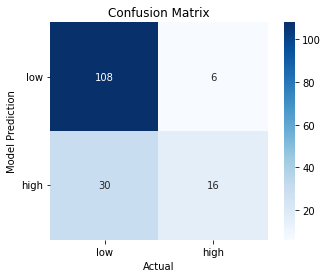

In [ ]:
confusion_matrix_visual(
... r_y_test, quality_preds, ['low', 'high']
... )

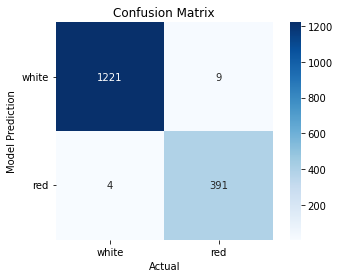

In [ ]:
confusion_matrix_visual(
... w_y_test, kind_preds, ['white', 'red']
... )

### Classification metrics

In [ ]:
#Accuracy and Error rate (apply when our classes are roughly equal in size)

In [ ]:
red_quality_lr.score(r_X_test, r_y_test)

0.775

In [ ]:
from sklearn.metrics import zero_one_loss
>>> zero_one_loss(r_y_test, quality_preds)

0.22499999999999998

In [ ]:
# Precision and recall ( class imbalance)